# Example Time Series Charts

These examples show creating time series charts to identify outliers and see seasonal patterns in crime.

Wheeler, A. P. (2016). Tables and graphs for monitoring temporal crime trends: Translating theory into practical crime analysis advice. [*International Journal of Police Science & Management*, 18(3), 159-172](https://journals.sagepub.com/doi/abs/10.1177/1461355716642781). [Preprint](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2551472)

In [1]:
from crimepy import query, time
from crimepy.cdcplot import plt
import pandas as pd

# Chicago Robberies
chic_url = 'https://data.cityofchicago.org/resource/ijzp-q8t2.json'
parm = "?$where=date>'2015-01-01'&primary_type='ROBBERY'"
res_rob = query.query_socrata(chic_url,add_params=parm)
res_rob['ReportDate'] = pd.to_datetime(res_rob['date'].str[:10])
res_rob.head(2).T

,0,1
id,12131221,12729745
case_number,JD327000,JF279458
date,2020-08-10T09:45:00.000,2022-06-14T14:47:00.000
block,015XX N DAMEN AVE,035XX N CENTRAL AVE
iucr,0326,0340
primary_type,ROBBERY,ROBBERY
description,AGGRAVATED VEHICULAR HIJACKING,ATTEMPT STRONG ARM - NO WEAPON
location_description,STREET,BANK
arrest,True,True
domestic,False,False


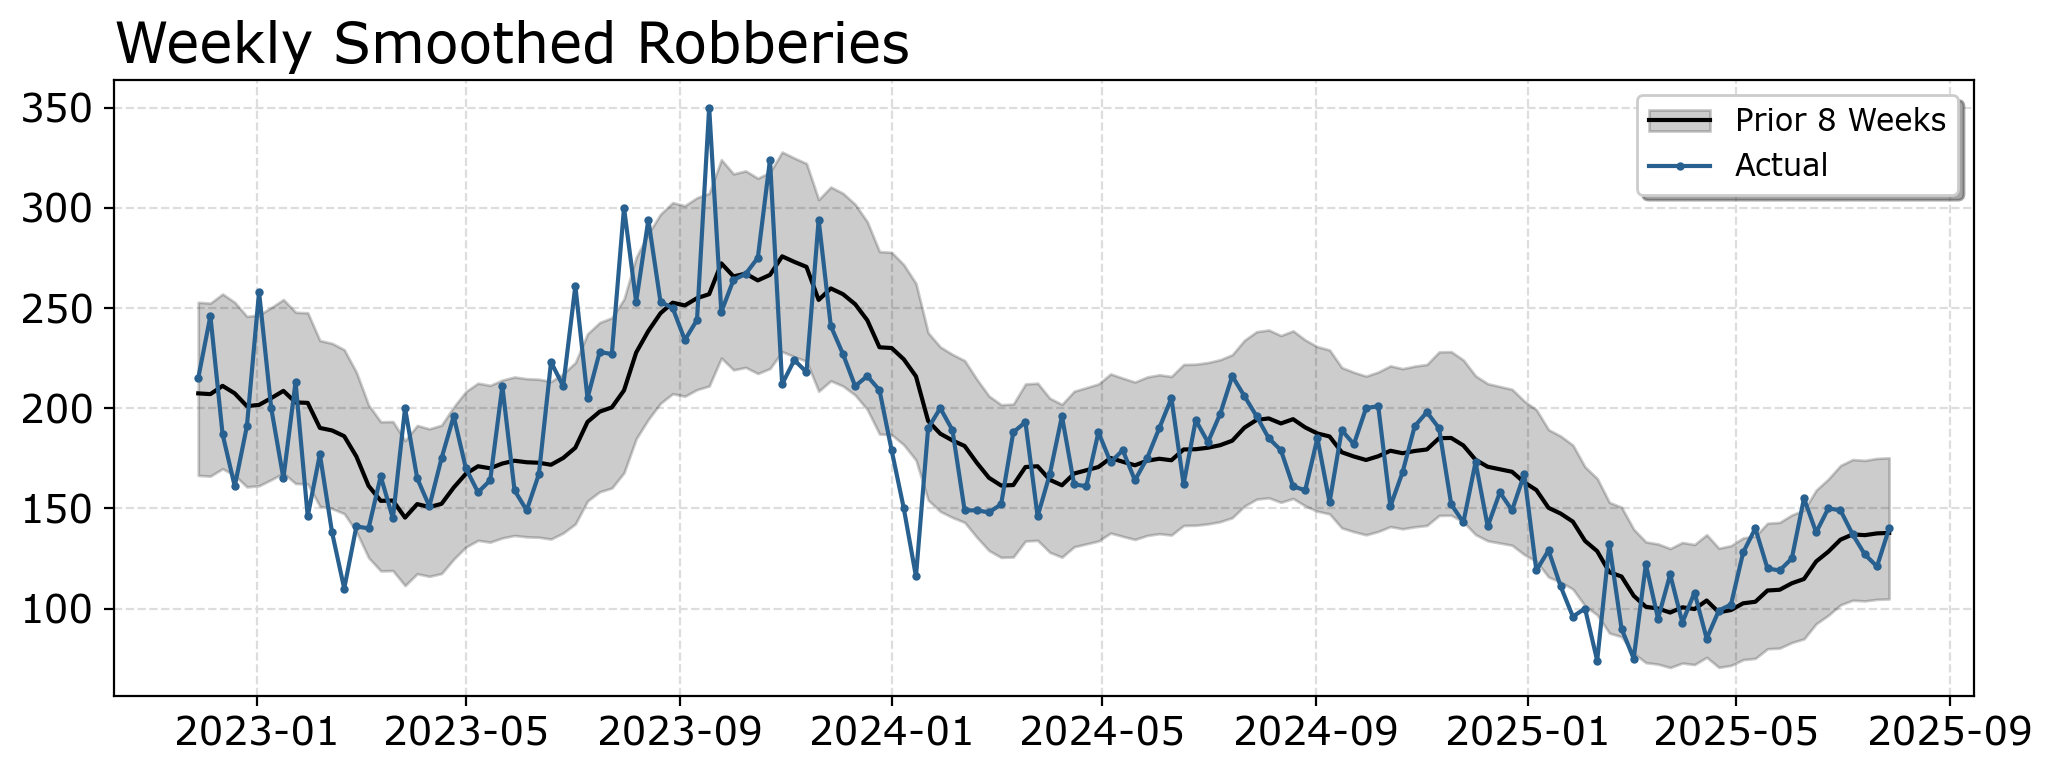

In [2]:
# Week Charts
week_rob = time.weekly_data(res_rob,'ReportDate')
time.week_chart(week_rob,title='Weekly Smoothed Robberies',legend_loc='upper right',
                max_weeks=140)

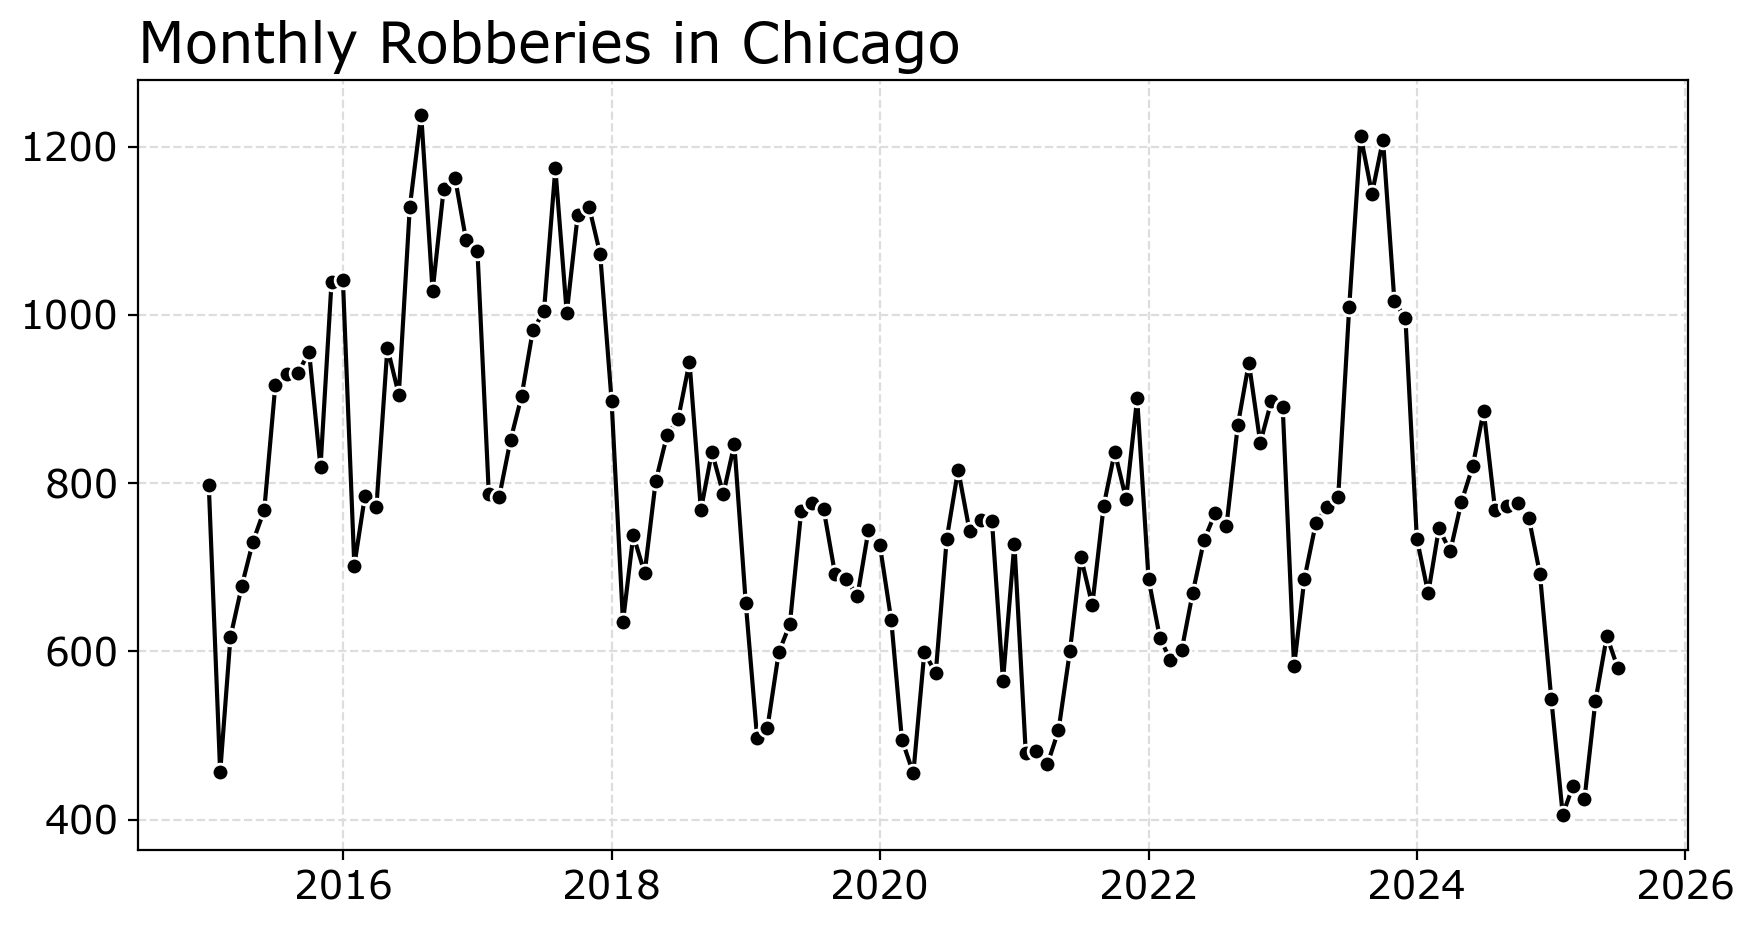

In [3]:
# Monthly chart
month_rob = time.monthly_data(res_rob,'ReportDate')
time.month_chart(month_rob,title='Monthly Robberies in Chicago')

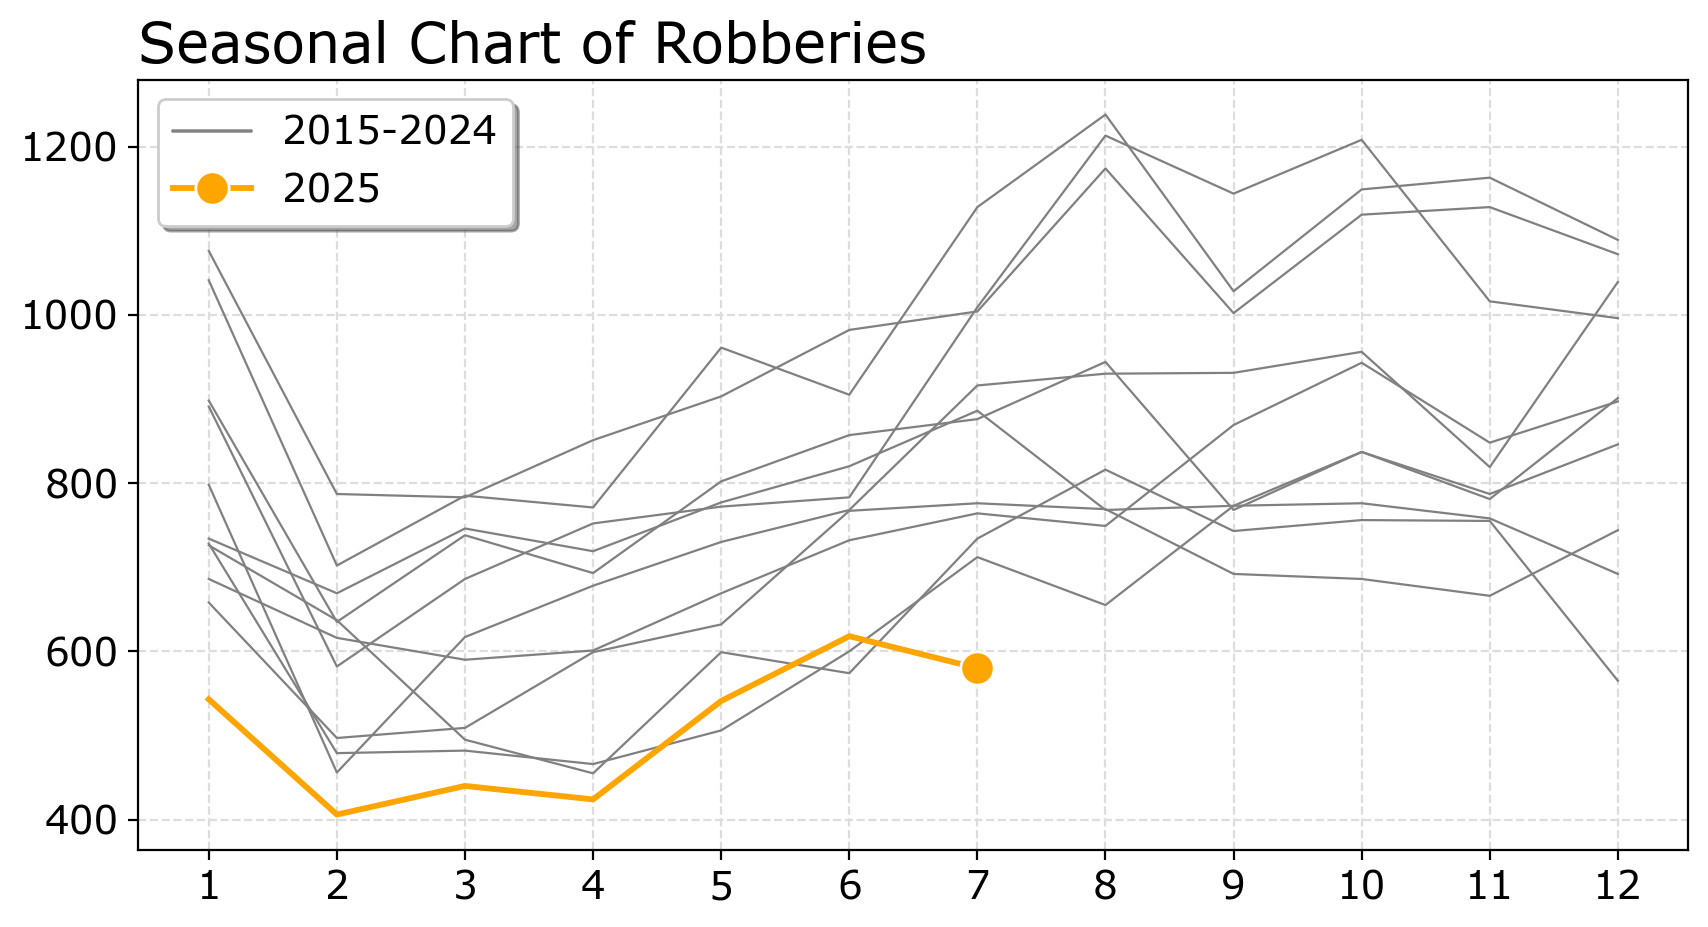

In [4]:
# Seasonal chart
time.seas_chart(month_rob,title='Seasonal Chart of Robberies')

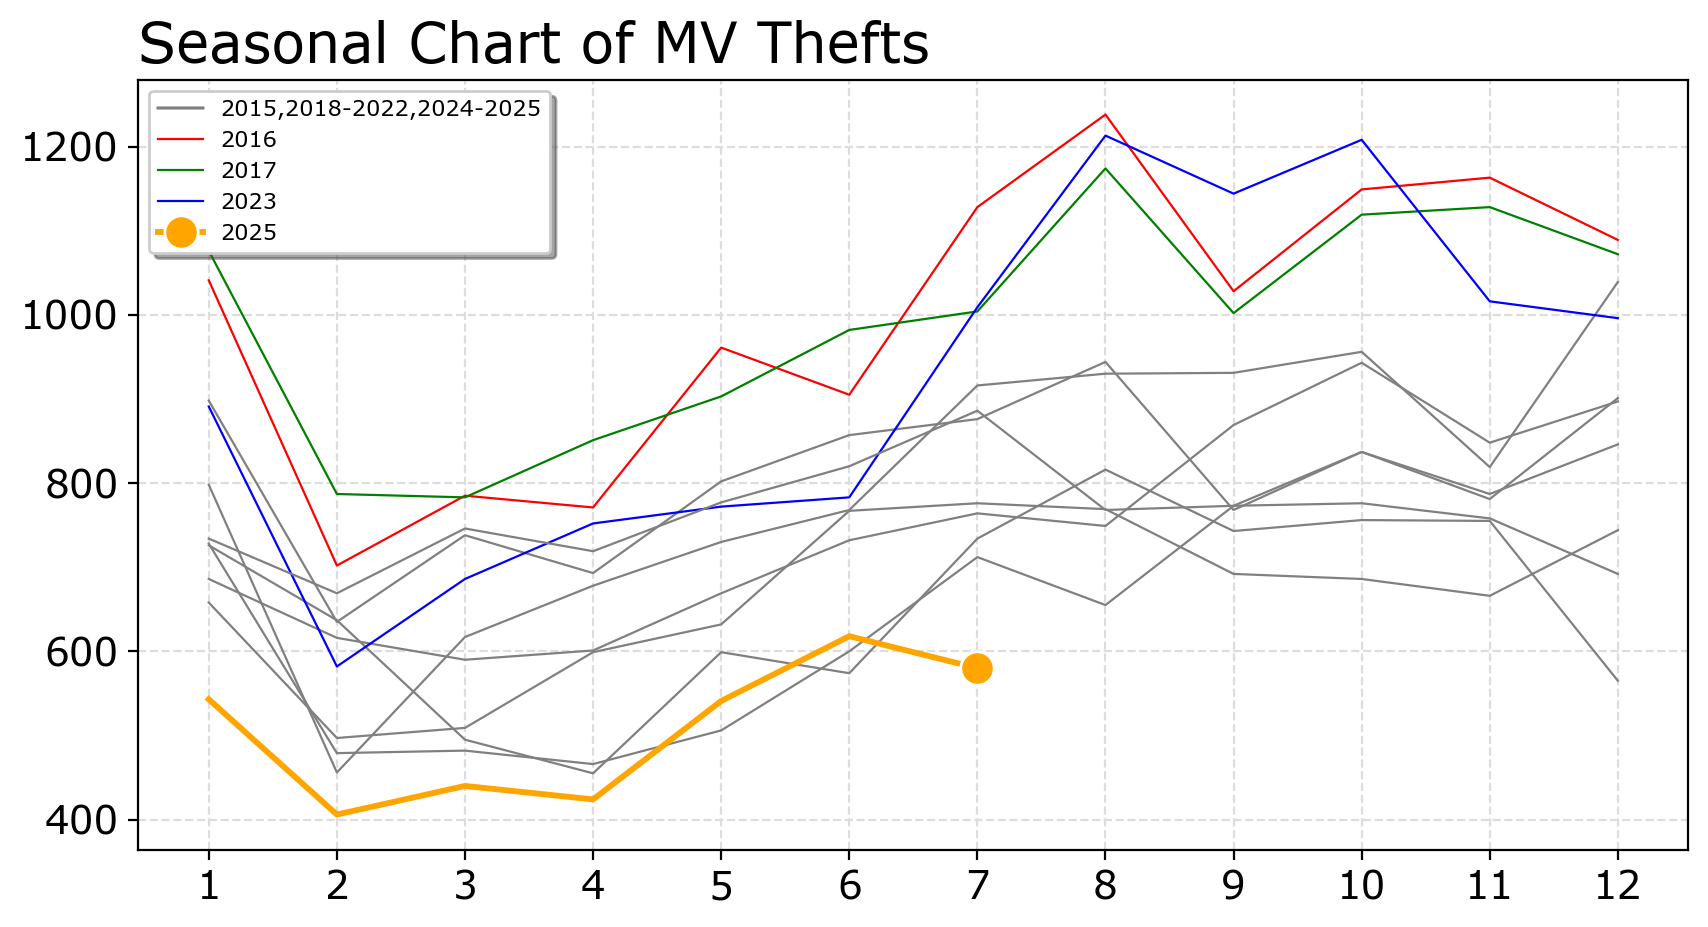

In [5]:
# Can highlight certain years
# legend gets a bit messy
high_years = {2023: 'blue', 2016: 'red', 2017: 'green'}

time.seas_chart(month_rob,title='Seasonal Chart of MV Thefts',
                year_colors=high_years,leg_kwargs={'prop': {'size':8}})

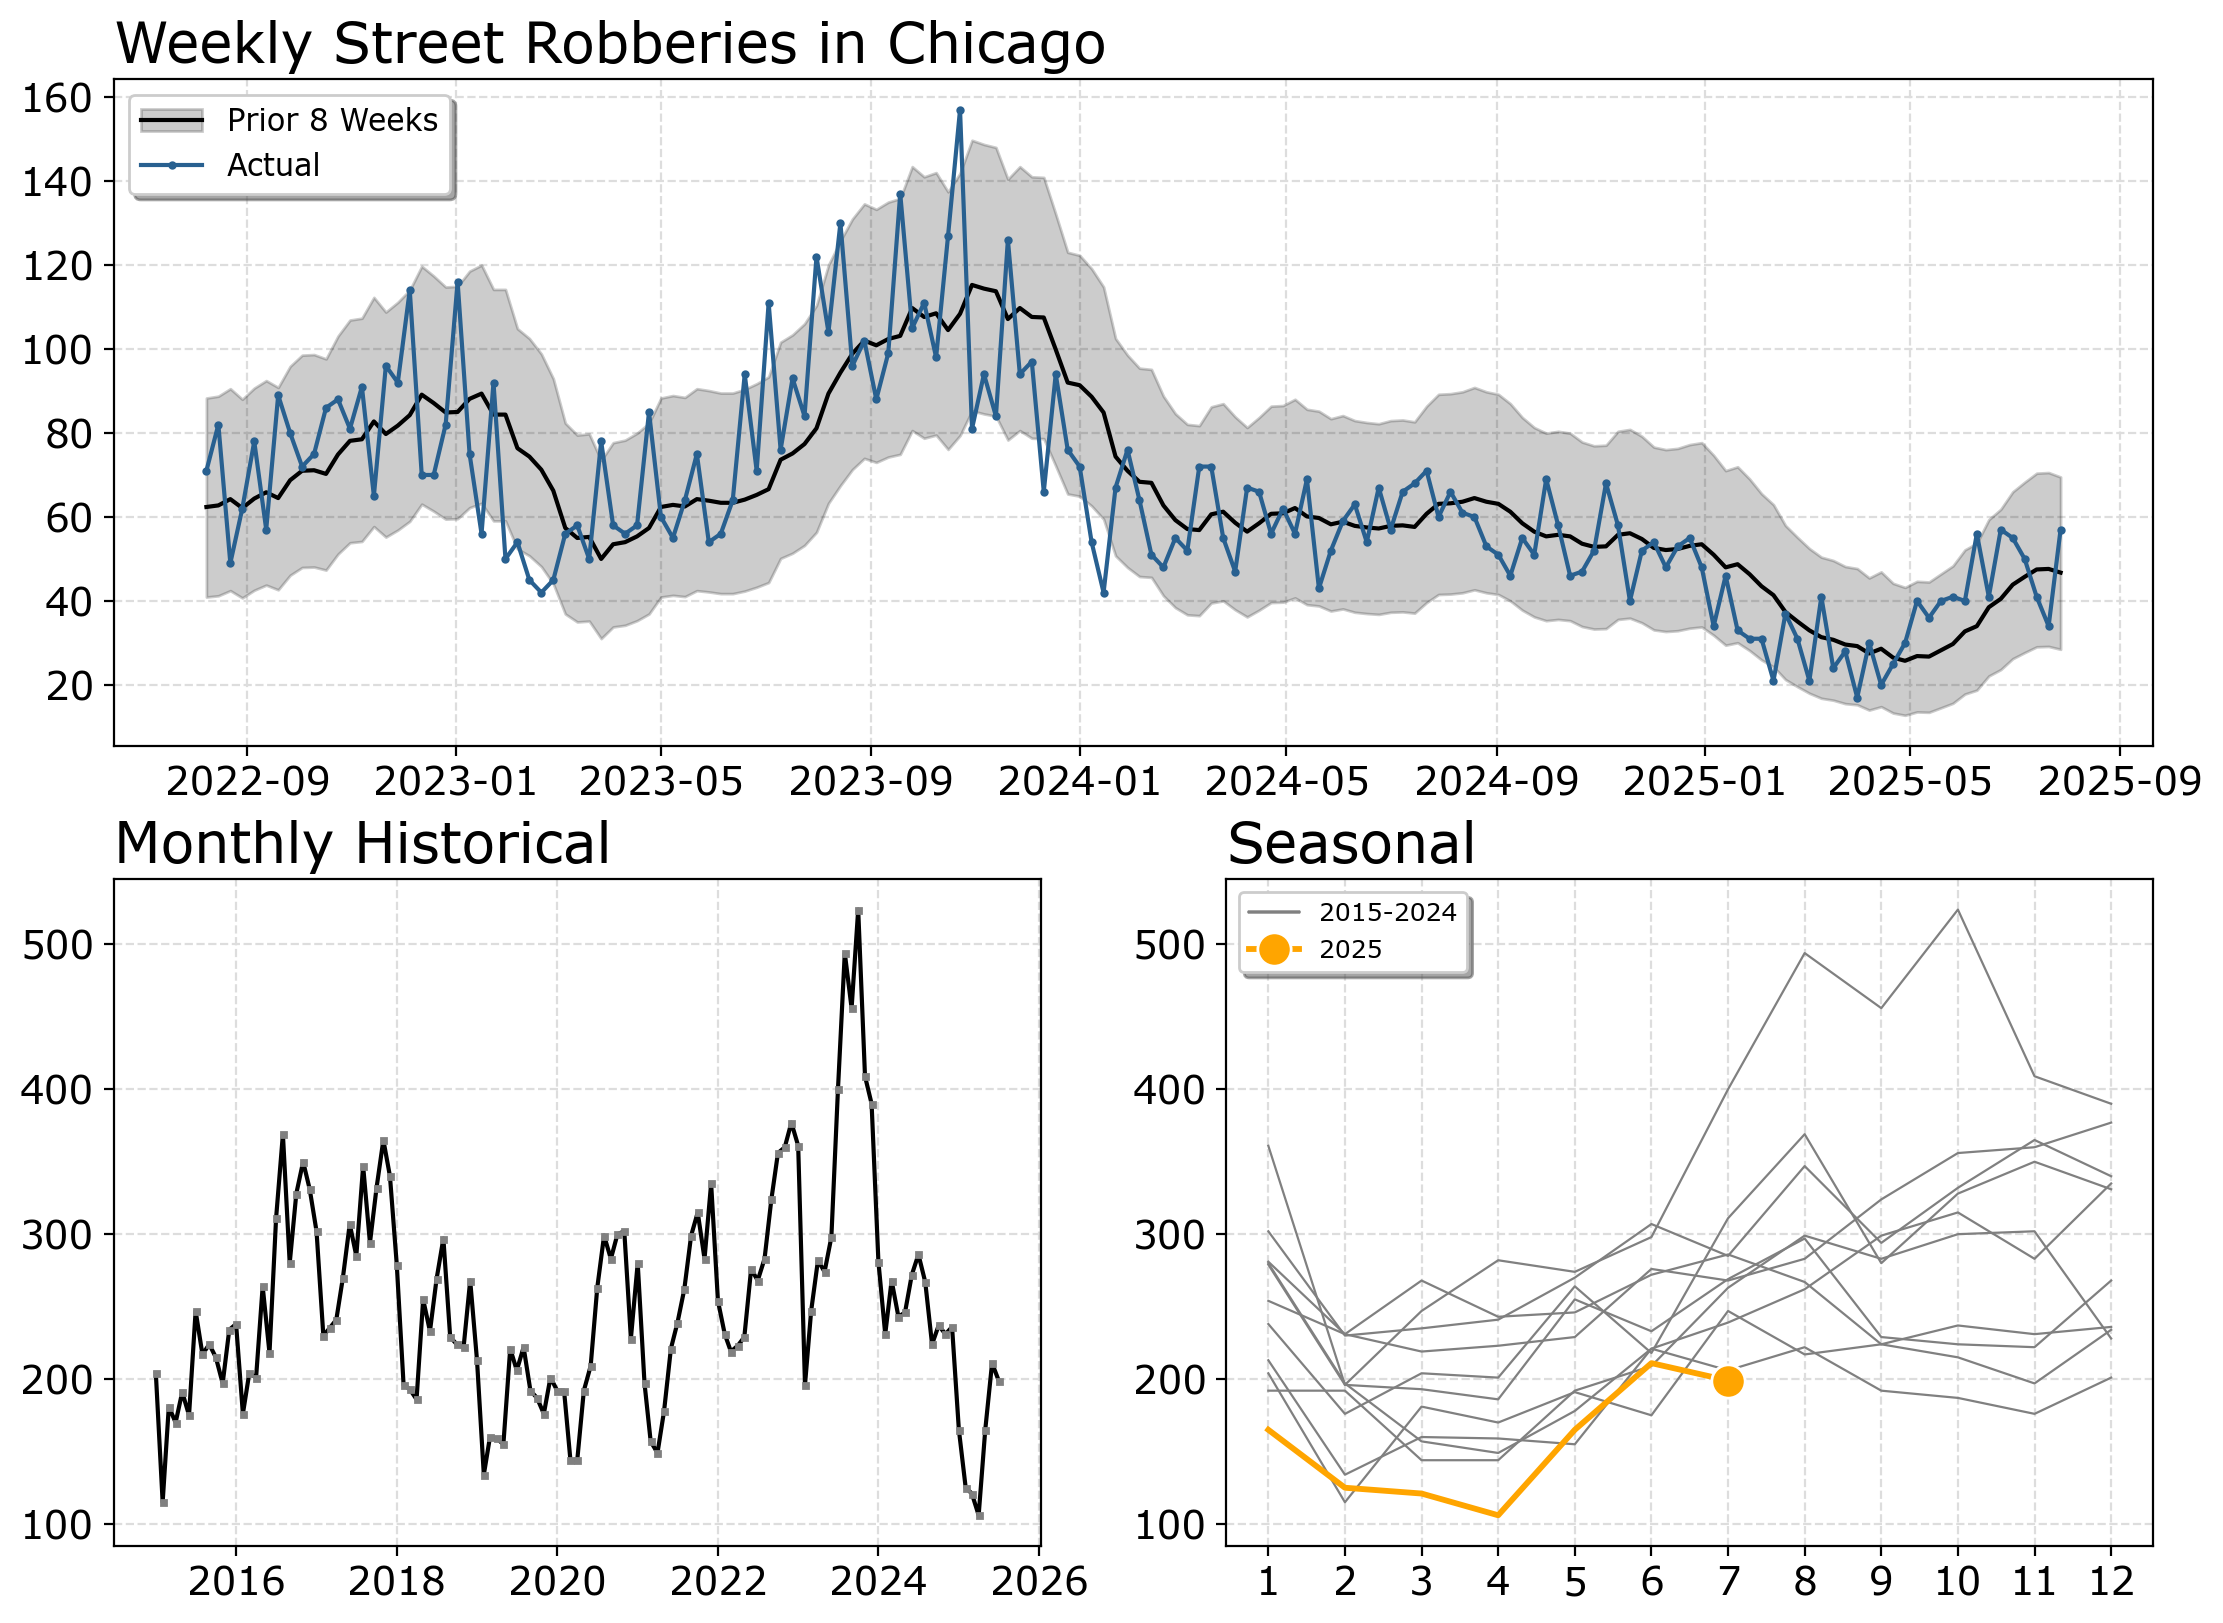

In [6]:
# Combining all of the charts together!
# Lets just look at street robberies
street_rob = res_rob[res_rob['location_description'] == 'STREET'].copy()
month_data = time.monthly_data(street_rob,'ReportDate')
weekly_data = time.weekly_data(street_rob,'ReportDate')

mos = [['A','A'],['B','C']]
fig, ax = plt.subplot_mosaic(mos,figsize=(11,8),layout="constrained")
li_kw = {'color':'k','marker':'s','markerfacecolor': 'grey','markeredgecolor': 'grey','markersize':1.8}
a = time.month_chart(data=month_data,ax=ax['B'],title='Monthly Historical',file='return',line_kwargs=li_kw)

leg_kwargs= {'prop': {'size': 9}}
a = time.seas_chart(data=month_data,ax=ax['C'],title='Seasonal',file='return',leg_kwargs=leg_kwargs)
a = time.week_chart(data=weekly_data,ax=ax['A'],title='Weekly Street Robberies in Chicago',
                    max_weeks=52*3,legend_loc='upper left',file='return')

In [7]:
# If you must, I have helper functions for YTD stats
# expects a column of dummy variables to sum up

# querying Cary data for examples
cary_base = ('https://data.townofcary.org/api/explore/v2.1/catalog/datasets'
             '/cpd-incidents/exports/csv?lang=en&timezone=US%2FEastern'
             '&use_labels=true&delimiter=%2C')

cary_df = query.query_opendata(cary_base,'&where=year>2010')
cary_df['ReportDate'] = pd.to_datetime(cary_df['End Date Of Occurrence'],utc=True)

ytd_py, last_date = time.ytd_stats(cary_df,'ReportDate','Crime Category')
print(f'As of {last_date}')
ytd_py

As of 2025-08-05


Year,Crime Category,2025,2024,Difference,PoissonZ
0,AGGRAVATED ASSAULT,33.0,54.0,-21.0,-3.207813
1,ALL OTHER,1815.0,1863.0,-48.0,-1.119334
2,ARSON,7.0,6.0,1.0,0.392523
3,BURGLARY,71.0,106.0,-35.0,-3.738961
4,LARCENY,897.0,1085.0,-188.0,-5.978760
5,MOTOR VEHICLE THEFT,190.0,185.0,5.0,0.365156
6,MURDER,1.0,0.0,1.0,2.000000
7,ROBBERY,7.0,12.0,-5.0,-1.636701


In [8]:
# And you can do multiple years if you want
ytd_multiple, last_date = time.ytd_stats(cary_df,'ReportDate','Crime Category',prior_years=5)
ytd_multiple

Year,Crime Category,2025,Average Prior 5 Years,Difference,PoissonZ,2024,2023,2022,2021,2020
0,AGGRAVATED ASSAULT,33.0,95.4,-62.4,-8.045459,54.0,108.0,123.0,105.0,87.0
1,ALL OTHER,1815.0,1610.0,205.0,4.956023,1863.0,1675.0,1461.0,1497.0,1554.0
2,ARSON,7.0,4.2,2.8,1.192722,6.0,3.0,4.0,4.0,4.0
3,BURGLARY,71.0,101.8,-30.8,-3.326898,106.0,102.0,80.0,98.0,123.0
4,LARCENY,897.0,829.8,67.2,2.287418,1085.0,896.0,614.0,790.0,764.0
5,MOTOR VEHICLE THEFT,190.0,180.0,10.0,0.735282,185.0,286.0,166.0,129.0,134.0
6,MURDER,1.0,0.4,0.6,0.735089,0.0,1.0,0.0,1.0,0.0
7,ROBBERY,7.0,11.0,-4.0,-1.341747,12.0,11.0,8.0,10.0,14.0


In [9]:
# Or just still do the prior year, but get the additional columns
ytd_noavg, last_date = time.ytd_stats(cary_df,'ReportDate','Crime Category',prior_years=5,average=False)
ytd_noavg

Year,Crime Category,2025,2024,2023,2022,2021,2020,Difference,PoissonZ
0,AGGRAVATED ASSAULT,33.0,54.0,108.0,123.0,105.0,87.0,-21.0,-3.207813
1,ALL OTHER,1815.0,1863.0,1675.0,1461.0,1497.0,1554.0,-48.0,-1.119334
2,ARSON,7.0,6.0,3.0,4.0,4.0,4.0,1.0,0.392523
3,BURGLARY,71.0,106.0,102.0,80.0,98.0,123.0,-35.0,-3.738961
4,LARCENY,897.0,1085.0,896.0,614.0,790.0,764.0,-188.0,-5.978760
5,MOTOR VEHICLE THEFT,190.0,185.0,286.0,166.0,129.0,134.0,5.0,0.365156
6,MURDER,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.000000
7,ROBBERY,7.0,12.0,11.0,8.0,10.0,14.0,-5.0,-1.636701
